✓ PyTorch device: cuda:0
✓ Quantum device: default.qubit (torch interface, backprop)
🔬 Initializing Hybrid Quantum GAN
   Device: cuda:0
   Qubits: 5 (1 ancillary)
   Generators: 4 (patch size: 16)

Loaded 178 samples of digit '0'
🚀 Starting training for 50 epochs...
--------------------------------------------------
Epoch   0 | Loss D: 1.2994 | Loss G: 0.7212
Epoch  10 | Loss D: 0.0440 | Loss G: 4.4389
Epoch  20 | Loss D: 0.0073 | Loss G: 6.2381
Epoch  30 | Loss D: 0.0032 | Loss G: 6.9651
Epoch  40 | Loss D: 0.0017 | Loss G: 7.1871
--------------------------------------------------
✅ Training Complete!
Checkpoint saved to checkpoint.pt
Saved training progress to training_progress.png


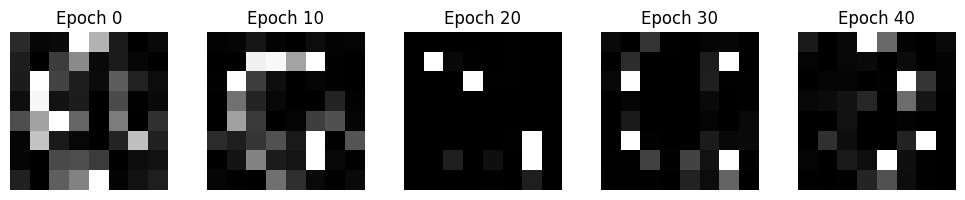

In [ ]:
# train.py
"""
Main training script for Hybrid Quantum-Classical GAN.
Run this file to start training.
"""
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

import config
import dataset
import models
import utils


def train():
    """Main training loop."""
    
    # --- Setup ---
    utils.set_seed()
    print(f"🔬 Initializing Hybrid Quantum GAN")
    print(f"   Device: {config.DEVICE}")
    print(f"   Qubits: {config.N_QUBITS} ({config.N_A_QUBITS} ancillary)")
    print(f"   Generators: {config.N_GENERATORS} (patch size: {config.PATCH_SIZE})")
    print()
    
    # Data
    dataloader = dataset.get_dataloader()
    
    # Models
    generator = models.PatchQuantumGenerator().to(config.DEVICE)
    discriminator = models.Discriminator().to(config.DEVICE)
    
    # Loss & Optimizers
    criterion = nn.BCELoss()
    optG = optim.SGD(generator.parameters(), lr=config.LR_GENERATOR)
    optD = optim.SGD(discriminator.parameters(), lr=config.LR_DISCRIMINATOR)
    
    # Labels
    real_labels = torch.ones(config.BATCH_SIZE, 1, device=config.DEVICE)
    fake_labels = torch.zeros(config.BATCH_SIZE, 1, device=config.DEVICE)
    
    # History for visualization
    history_images = []
    history_loss_G = []
    history_loss_D = []
    
    # --- Training Loop ---
    print(f"🚀 Starting training for {config.NUM_EPOCHS} epochs...")
    print("-" * 50)
    
    for epoch in range(config.NUM_EPOCHS):
        epoch_loss_D = 0
        epoch_loss_G = 0
        n_batches = 0
        
        for real_imgs, _ in dataloader:
            real_imgs = real_imgs.to(config.DEVICE)
            
            # =====================
            # Train Discriminator
            # =====================
            discriminator.zero_grad()
            
            # Real images
            out_real = discriminator(real_imgs)
            loss_real = criterion(out_real, real_labels)
            
            # Fake images
            noise = torch.rand(config.BATCH_SIZE, config.N_QUBITS, device=config.DEVICE) * np.pi / 2
            fake_imgs = generator(noise)
            out_fake = discriminator(fake_imgs.detach())
            loss_fake = criterion(out_fake, fake_labels)
            
            # Update discriminator
            loss_D = loss_real + loss_fake
            loss_D.backward()
            optD.step()
            
            # =====================
            # Train Generator
            # =====================
            generator.zero_grad()
            
            # Generator wants discriminator to think fakes are real
            out_gen = discriminator(fake_imgs)
            loss_G = criterion(out_gen, real_labels)
            
            loss_G.backward()
            optG.step()
            
            # Accumulate losses
            epoch_loss_D += loss_D.item()
            epoch_loss_G += loss_G.item()
            n_batches += 1
        
        # Average losses for epoch
        avg_loss_D = epoch_loss_D / n_batches
        avg_loss_G = epoch_loss_G / n_batches
        history_loss_D.append(avg_loss_D)
        history_loss_G.append(avg_loss_G)
        
        # Logging
        if epoch % config.LOG_INTERVAL == 0:
            print(f"Epoch {epoch:3d} | Loss D: {avg_loss_D:.4f} | Loss G: {avg_loss_G:.4f}")
            
            # Save sample image
            with torch.no_grad():
                test_noise = torch.rand(1, config.N_QUBITS, device=config.DEVICE) * np.pi / 2
                gen_img = generator(test_noise).view(config.IMAGE_SIZE, config.IMAGE_SIZE)
                history_images.append(gen_img.cpu().numpy())
    
    print("-" * 50)
    print("✅ Training Complete!")
    
    # --- Save & Visualize ---
    utils.save_checkpoint(generator, discriminator, config.NUM_EPOCHS)
    utils.visualize_training_progress(history_images, save_path='training_progress.png')
    
    return generator, discriminator, history_images


if __name__ == "__main__":
    train()

In [1]:
import torch
print(f"CUDA available: {torch.cuda.is_available()}")
print(f"GPU: {torch.cuda.get_device_name(0) if torch.cuda.is_available() else 'None'}")

CUDA available: True
GPU: NVIDIA GeForce RTX 3050 Laptop GPU


In [1]:
# train.py
"""
Main training script for Hybrid Quantum-Classical GAN.
Run this file to start training.
"""
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

import config
import dataset
import models
import utils


def train():
    """Main training loop."""
    
    # --- Setup ---
    utils.set_seed()
    print(f"🔬 Initializing Hybrid Quantum GAN")
    print(f"   Device: {config.DEVICE}")
    print(f"   Qubits: {config.N_QUBITS} ({config.N_A_QUBITS} ancillary)")
    print(f"   Generators: {config.N_GENERATORS} (patch size: {config.PATCH_SIZE})")
    print()
    
    # Data
    dataloader = dataset.get_dataloader()
    
    # Models
    generator = models.PatchQuantumGenerator().to(config.DEVICE)
    discriminator = models.Discriminator().to(config.DEVICE)
    
    # Loss & Optimizers
    criterion = nn.BCELoss()
    optG = optim.SGD(generator.parameters(), lr=config.LR_GENERATOR)
    optD = optim.SGD(discriminator.parameters(), lr=config.LR_DISCRIMINATOR)
    
    # Labels
    real_labels = torch.full((config.BATCH_SIZE, 1), 0.9, device=config.DEVICE)
    fake_labels = torch.zeros(config.BATCH_SIZE, 1, device=config.DEVICE)
    
    # History for visualization
    history_images = []
    history_loss_G = []
    history_loss_D = []
    
    # --- Training Loop ---
    print(f"🚀 Starting training for {config.NUM_EPOCHS} epochs...")
    print("-" * 50)
    
    for epoch in range(config.NUM_EPOCHS):
        epoch_loss_D = 0
        epoch_loss_G = 0
        n_batches = 0
        
        for real_imgs, _ in dataloader:
            real_imgs = real_imgs.to(config.DEVICE)
            
            # =====================
            # Train Discriminator
            # =====================
            discriminator.zero_grad()
            
            # Real images
            out_real = discriminator(real_imgs)
            loss_real = criterion(out_real, real_labels)
            
            # Fake images
            noise = torch.rand(config.BATCH_SIZE, config.N_QUBITS, device=config.DEVICE) * np.pi / 2
            fake_imgs = generator(noise)
            out_fake = discriminator(fake_imgs.detach())
            loss_fake = criterion(out_fake, fake_labels)
            
            # Update discriminator
            loss_D = loss_real + loss_fake
            loss_D.backward()
            optD.step()
            
            # =====================
            # Train Generator (3x more often)
            # =====================
            for _ in range(3):
                generator.zero_grad()
                
                # Generate fresh noise for every step
                noise = torch.rand(config.BATCH_SIZE, config.N_QUBITS, device=config.DEVICE) * np.pi / 2
                fake_imgs = generator(noise)
                
                # Generator wants discriminator to think fakes are real
                out_gen = discriminator(fake_imgs)
                loss_G = criterion(out_gen, real_labels)
                
                loss_G.backward()
                optG.step()
            
            # Accumulate losses
            epoch_loss_D += loss_D.item()
            epoch_loss_G += loss_G.item()
            n_batches += 1
        
        # Average losses for epoch
        avg_loss_D = epoch_loss_D / n_batches
        avg_loss_G = epoch_loss_G / n_batches
        history_loss_D.append(avg_loss_D)
        history_loss_G.append(avg_loss_G)
        
        # Logging
        if epoch % config.LOG_INTERVAL == 0:
            print(f"Epoch {epoch:3d} | Loss D: {avg_loss_D:.4f} | Loss G: {avg_loss_G:.4f}")
            
            # Save sample image
            with torch.no_grad():
                test_noise = torch.rand(1, config.N_QUBITS, device=config.DEVICE) * np.pi / 2
                gen_img = generator(test_noise).view(config.IMAGE_SIZE, config.IMAGE_SIZE)
                history_images.append(gen_img.cpu().numpy())
    
    print("-" * 50)
    print("✅ Training Complete!")
    
    # --- Save & Visualize ---
    utils.save_checkpoint(generator, discriminator, config.NUM_EPOCHS)
    utils.visualize_training_progress(history_images, save_path='training_progress.png')
    
    return generator, discriminator, history_images


if __name__ == "__main__":
    train()


✓ PyTorch device: cpu
✓ Quantum device: default.qubit (torch interface, backprop)
🔬 Initializing Hybrid Quantum GAN
   Device: cpu
   Qubits: 5 (1 ancillary)
   Generators: 4 (patch size: 16)

Loaded 178 samples of digit '0'
🚀 Starting training for 50 epochs...
--------------------------------------------------
Epoch   0 | Loss D: 1.3962 | Loss G: 0.7481
Epoch  10 | Loss D: 1.3666 | Loss G: 0.7616
Epoch  20 | Loss D: 1.3617 | Loss G: 0.7661
Epoch  30 | Loss D: 1.3479 | Loss G: 0.7781


KeyboardInterrupt: 